## Import Library and Data

In [1]:
import torch
import torchvision

import torchvision.datasets as datasets
import torchvision.transforms as transforms

# Setup data directory
import pathlib
data_dir = pathlib.Path("../data")

In [2]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## Download data

- Food101 in torchvision.datasets - https://pytorch.org/vision/stable/generated/torchvision.datasets.Food101.html
- Original Food101 dataset - https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/



In [3]:
# Get training data
train_data = datasets.Food101(root=data_dir, split="train", download=True)

# Get testing data
test_data = datasets.Food101(root=data_dir, split="test", download=True)

100%|██████████| 4996278331/4996278331 [05:01<00:00, 16545693.23it/s]


Extracting ../data/food-101.tar.gz to ../data


In [4]:
train_data

Dataset Food101
    Number of datapoints: 75750
    Root location: ../data
    split=train

In [5]:
class_names = train_data.classes
class_names

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

churros


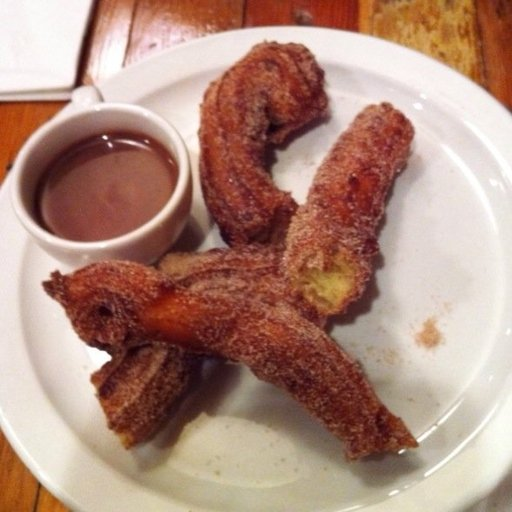

In [6]:
print(class_names[train_data[0][1]])
train_data[0][0]

# Find subset

Current path setup: ../data/food-101/images/CLASS_NAME/IMAGES.jpg

We want a list of the different target image classes: Churros, ice_cream, steak, pizza, sushi.

We will extract the filenames and then copy the images to separate folders.

I'd like to get a random 10% of the images from the target classes from both datasets.

In [7]:
# Get random 10% of training images
import random

# Setup data paths
data_path = data_dir / "food-101" / "images"
target_classes = ["churros", "ice_cream", "pizza", "steak", "sushi"]
amount_to_get = 0.1

# Create function to separate a random amount of data
def get_subset(image_path=data_path, data_splits=["train", "test"], target_classes=target_classes, amount=amount_to_get):
    random.seed(42)
    label_splits = {}

    # Get labels
    for data_split in data_splits:
        print(f"[INFO] Creating image split for: {data_split}...")
        label_path = data_dir / "food-101" / "meta" / f"{data_split}.txt"

        with open(label_path, "r") as f:
            labels = [line.strip("\n") for line in f.readlines() if line.split("/")[0] in target_classes]

        # Get random subset of target classes image ID's
        number_to_sample = round(amount * len(labels))
        print(f"[INFO] Getting random subset of {number_to_sample} images for {data_split}...")
        sampled_images = random.sample(labels, k=number_to_sample)

        # Apply full paths
        image_paths = [pathlib.Path(str(image_path / sample_image) + ".jpg") for sample_image in sampled_images]
        label_splits[data_split] = image_paths
    return label_splits

label_splits = get_subset(amount=amount_to_get)
label_splits["train"][:10]

[INFO] Creating image split for: train...
[INFO] Getting random subset of 375 images for train...
[INFO] Creating image split for: test...
[INFO] Getting random subset of 125 images for test...


[PosixPath('../data/food-101/images/steak/2796102.jpg'),
 PosixPath('../data/food-101/images/churros/3052347.jpg'),
 PosixPath('../data/food-101/images/churros/1456902.jpg'),
 PosixPath('../data/food-101/images/sushi/1165660.jpg'),
 PosixPath('../data/food-101/images/ice_cream/2677379.jpg'),
 PosixPath('../data/food-101/images/ice_cream/2172120.jpg'),
 PosixPath('../data/food-101/images/ice_cream/1864081.jpg'),
 PosixPath('../data/food-101/images/churros/3607340.jpg'),
 PosixPath('../data/food-101/images/sushi/1070104.jpg'),
 PosixPath('../data/food-101/images/churros/2891977.jpg')]

Move training and testing images to dedicated folders

In [8]:
# Create target directory path
target_dir_name = f"../data/churros_ice_cream_pizza_steak_sushi_{str(int(amount_to_get*100))}_percent"
print(f"Creating directory: '{target_dir_name}'")

# Setup the directories
target_dir = pathlib.Path(target_dir_name)

# Make the directories
target_dir.mkdir(parents=True, exist_ok=True)

Creating directory: '../data/churros_ice_cream_pizza_steak_sushi_10_percent'


In [9]:
import shutil

for image_split in label_splits.keys():
    for image_path in label_splits[str(image_split)]:
        dest_dir = target_dir / image_split / image_path.parent.stem / image_path.name
        if not dest_dir.parent.is_dir():
            dest_dir.parent.mkdir(parents=True, exist_ok=True)
        print(f"[INFO] Copying {image_path} to {dest_dir}...")
        shutil.copy2(image_path, dest_dir)

[INFO] Copying ../data/food-101/images/steak/2796102.jpg to ../data/churros_ice_cream_pizza_steak_sushi_10_percent/train/steak/2796102.jpg...
[INFO] Copying ../data/food-101/images/churros/3052347.jpg to ../data/churros_ice_cream_pizza_steak_sushi_10_percent/train/churros/3052347.jpg...
[INFO] Copying ../data/food-101/images/churros/1456902.jpg to ../data/churros_ice_cream_pizza_steak_sushi_10_percent/train/churros/1456902.jpg...
[INFO] Copying ../data/food-101/images/sushi/1165660.jpg to ../data/churros_ice_cream_pizza_steak_sushi_10_percent/train/sushi/1165660.jpg...
[INFO] Copying ../data/food-101/images/ice_cream/2677379.jpg to ../data/churros_ice_cream_pizza_steak_sushi_10_percent/train/ice_cream/2677379.jpg...
[INFO] Copying ../data/food-101/images/ice_cream/2172120.jpg to ../data/churros_ice_cream_pizza_steak_sushi_10_percent/train/ice_cream/2172120.jpg...
[INFO] Copying ../data/food-101/images/ice_cream/1864081.jpg to ../data/churros_ice_cream_pizza_steak_sushi_10_percent/train

Zip up images folder to be more easily transported

In [10]:
# Zip pizza_steak_sushi images
zip_file_name = data_dir / f"churros_ice_cream_pizza_steak_sushi_{str(int(amount_to_get*100))}_percent"
shutil.make_archive(zip_file_name, format="zip", root_dir=target_dir)

'/data/churros_ice_cream_pizza_steak_sushi_10_percent.zip'

In [11]:
!ls -la ../data/

total 4904268
drwxr-xr-x 4 root root       4096 Oct 31 10:09 .
drwxr-xr-x 1 root root       4096 Oct 31 10:02 ..
drwxr-xr-x 4 root root       4096 Oct 31 10:09 churros_ice_cream_pizza_steak_sushi_10_percent
-rw-r--r-- 1 root root   25665866 Oct 31 10:09 churros_ice_cream_pizza_steak_sushi_10_percent.zip
drwxr-xr-x 4 3156  320       4096 Jul  9  2014 food-101
-rw-r--r-- 1 root root 4996278331 Oct 31 10:07 food-101.tar.gz


## Use the new dataset

In [15]:
!mkdir -p churros_ice_cream_pizza_steak_sushi
!unzip ../data/churros_ice_cream_pizza_steak_sushi_10_percent.zip -d churros_ice_cream_pizza_steak_sushi

Archive:  ../data/churros_ice_cream_pizza_steak_sushi_10_percent.zip
   creating: churros_ice_cream_pizza_steak_sushi/test/
   creating: churros_ice_cream_pizza_steak_sushi/train/
   creating: churros_ice_cream_pizza_steak_sushi/test/churros/
   creating: churros_ice_cream_pizza_steak_sushi/test/ice_cream/
   creating: churros_ice_cream_pizza_steak_sushi/test/pizza/
   creating: churros_ice_cream_pizza_steak_sushi/test/steak/
   creating: churros_ice_cream_pizza_steak_sushi/test/sushi/
  inflating: churros_ice_cream_pizza_steak_sushi/test/sushi/2307232.jpg  
  inflating: churros_ice_cream_pizza_steak_sushi/test/sushi/283089.jpg  
  inflating: churros_ice_cream_pizza_steak_sushi/test/sushi/1434806.jpg  
  inflating: churros_ice_cream_pizza_steak_sushi/test/sushi/897488.jpg  
  inflating: churros_ice_cream_pizza_steak_sushi/test/sushi/1994748.jpg  
  inflating: churros_ice_cream_pizza_steak_sushi/test/sushi/3092206.jpg  
  inflating: churros_ice_cream_pizza_steak_sushi/test/sushi/710402.

In [25]:
from pathlib import Path

# Setup path to data folder
data_path = Path("churros_ice_cream_pizza_steak_sushi")

# Setup train and testing paths
train_dir = data_path / "train"
test_dir = data_path / "test"

train_dir, test_dir

(PosixPath('churros_ice_cream_pizza_steak_sushi/train'),
 PosixPath('churros_ice_cream_pizza_steak_sushi/test'))

Visualize an image

Random image path: churros_ice_cream_pizza_steak_sushi/train/churros/258780.jpg
Image class: churros
Image height: 512
Image width: 384


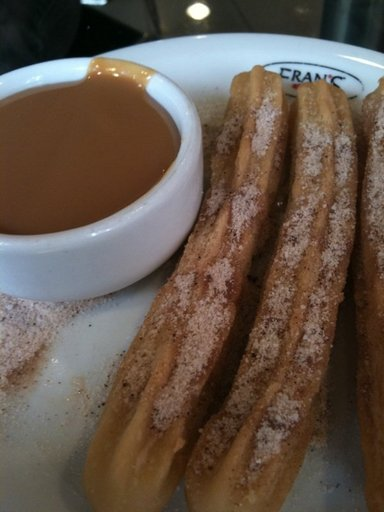

In [26]:
import random
from PIL import Image

random.seed(42)

image_path_list = list(image_path.glob("*/*/*.jpg"))
random_image_path = random.choice(image_path_list)
image_class = random_image_path.parent.stem
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

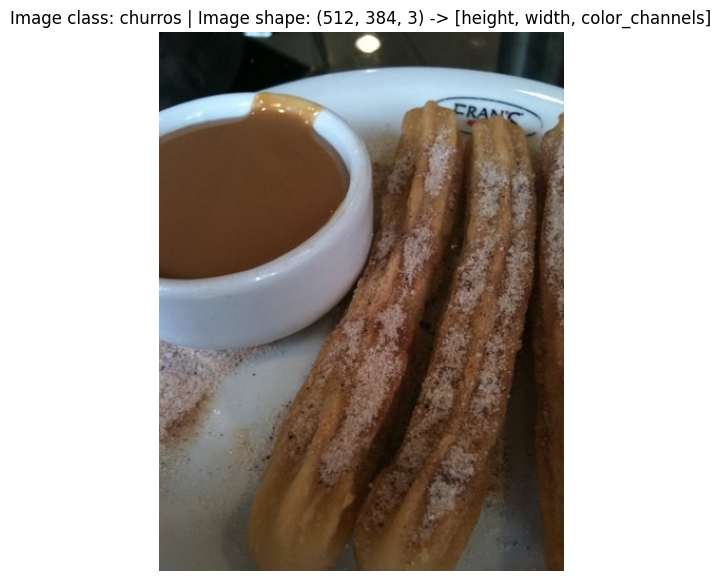

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape}")
plt.axis(False);

Transforming Data

In [28]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [29]:
# Write transform for image
data_transform = transforms.Compose([
    # Resize the images to 64x64
    transforms.Resize(size=(64, 64)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5), # p = probability of flip, 0.5 = 50% chance
    # Turn the image into a torch.Tensor
    transforms.ToTensor() # this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0
])

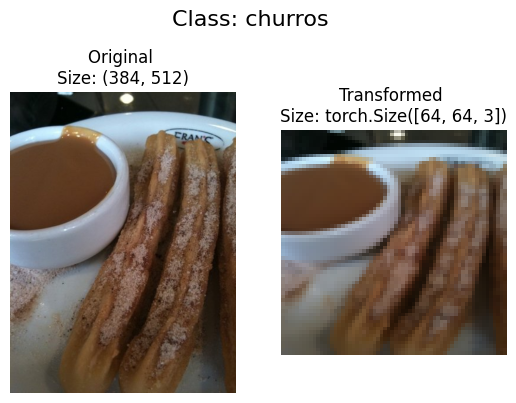

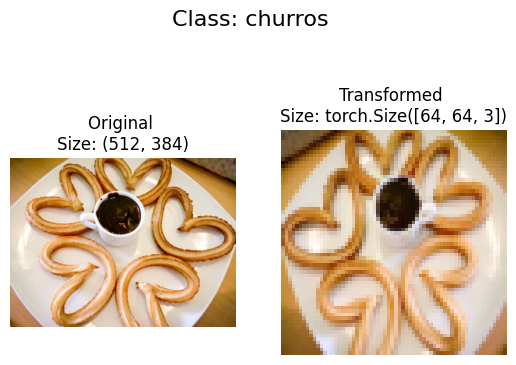

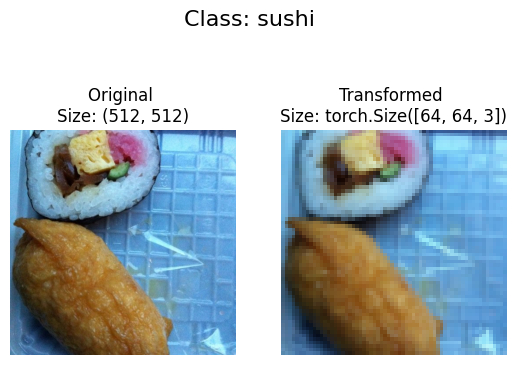

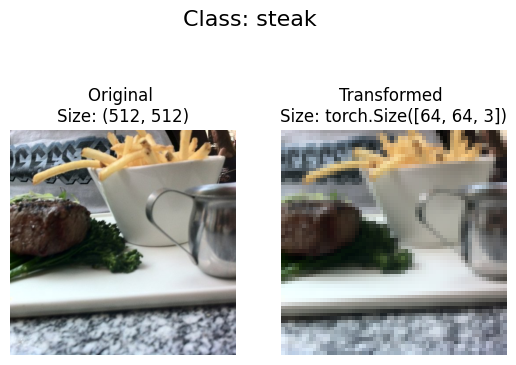

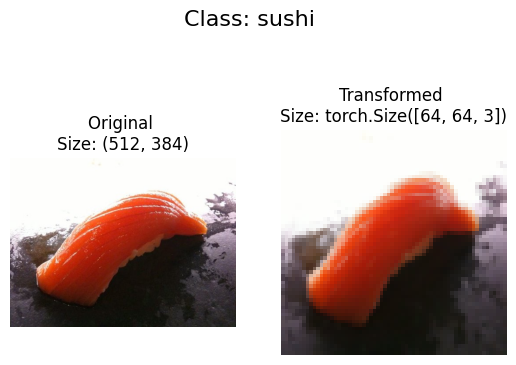

In [31]:
def plot_transformed_images(image_paths, transform, n=3):

    random.seed(42)
    random_image_paths = random.sample(image_paths, k=n)

    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list, transform=data_transform, n=5)

Option 1: loading image data using ImageFolder

In [32]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets

train_data = datasets.ImageFolder(root=train_dir, transform=data_transform, target_transform=None)
test_data = datasets.ImageFolder(root=test_dir, transform=data_transform)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 375
    Root location: churros_ice_cream_pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 125
    Root location: churros_ice_cream_pizza_steak_sushi/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [33]:
class_names = train_data.classes
class_names

['churros', 'ice_cream', 'pizza', 'steak', 'sushi']

In [34]:
len(train_data), len(test_data)

(375, 125)

In [35]:
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0.6902, 0.6980, 0.7294,  ..., 0.5961, 0.6392, 0.5961],
         [0.6588, 0.6549, 0.6667,  ..., 0.6588, 0.6941, 0.6549],
         [0.6275, 0.6275, 0.6275,  ..., 0.7373, 0.7176, 0.6431],
         ...,
         [0.7804, 0.7294, 0.7490,  ..., 0.9098, 0.9137, 0.9059],
         [0.7882, 0.7333, 0.7451,  ..., 0.9098, 0.9098, 0.9059],
         [0.7961, 0.7451, 0.7490,  ..., 0.9059, 0.9059, 0.9059]],

        [[0.5882, 0.6000, 0.6392,  ..., 0.4353, 0.5059, 0.4510],
         [0.5490, 0.5529, 0.5686,  ..., 0.5020, 0.5725, 0.5137],
         [0.5255, 0.5255, 0.5294,  ..., 0.5843, 0.5765, 0.4824],
         ...,
         [0.7176, 0.4902, 0.5020,  ..., 0.8902, 0.8902, 0.8863],
         [0.7412, 0.5294, 0.4941,  ..., 0.8902, 0.8902, 0.8824],
         [0.7569, 0.5882, 0.4902,  ..., 0.8902, 0.8863, 0.8824]],

        [[0.4314, 0.4549, 0.5059,  ..., 0.2078, 0.2980, 0.2549],
         [0.3961, 0.4118, 0.4314,  ..., 0.2314, 0.3176, 0.3059],
         [0.3608, 0.3686, 0.3804,  ..., 0.28

Original shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Image permute shape: torch.Size([64, 64, 3]) -> [height, width, color_channels]


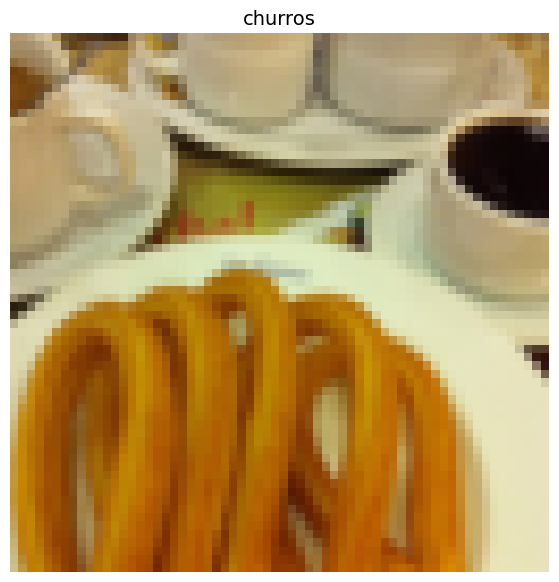

In [36]:
# Rearrange the order of dimensions
img_permute = img.permute(1, 2, 0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")
plt.title(class_names[label], fontsize=14);

4.1 Turn loaded images into DataLoader

In [37]:
# Turn train and test Datasets into DataLoaders
from torch.utils.data import DataLoader

train_dataloader = DataLoader(dataset=train_data, batch_size=1, num_workers=1, shuffle=True)
test_dataloader = DataLoader(dataset=test_data, batch_size=1, num_workers=1, shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7889020ecac0>,
 <torch.utils.data.dataloader.DataLoader at 0x7889020ecb80>)

In [38]:
img, label = next(iter(train_dataloader))

# Batch size will now be 1, try changing the batch_size parameter above and see what happens
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])
